# Feature Engineering

En este notebook se buscan atributos nuevos para concatenar al set de datos original, así pudiendo armar un modelo predictivo más robusto y eficiente.



In [195]:
# Importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [196]:
df_train = pd.read_csv('../data/train_cleaned.csv', index_col='building_id', low_memory=False)
df_test = pd.read_csv('../data/test_cleaned.csv', index_col='building_id', low_memory=False)

In [197]:
df_train.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# Conversion de tipos de datos
to_categorical = set(df_train.select_dtypes(include='object').columns.tolist())
to_bool = set([col for col in df_train.columns if 'has' in col])
to_numeric = set(df_train.select_dtypes(include='int64').columns.tolist()) - to_bool

for col in to_categorical:
    df_train[col] = df_train[col].astype('category')

for col in to_bool:
    df_train[col] = df_train[col].astype('bool')

for col in to_numeric:
    df_train[col] = pd.to_numeric(df_train[col], downcast='unsigned')


In [200]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   damage_grade                            260601 non-null  uint8   
 1   geo_level_1_id                          260601 non-null  uint8   
 2   geo_level_2_id                          260601 non-null  uint16  
 3   geo_level_3_id                          260601 non-null  uint16  
 4   count_floors_pre_eq                     260601 non-null  uint8   
 5   age                                     260601 non-null  uint8   
 6   area_percentage                         260601 non-null  uint8   
 7   height_percentage                       260601 non-null  uint8   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                  

In [201]:
df_train.isnull().sum()

damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [202]:
df_test.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

## Graficos de correlaciones entre variables con el dataset inicial

La columna has_secondary_use ya vimos que tiene informacion redundante con las de has_secondary_use_X

In [203]:
def drop_features_redundantes(df, features):
    df.drop(columns=features, inplace=True)

In [204]:
features_redundantes = ['has_secondary_use']
drop_features_redundantes(df_train, features_redundantes)

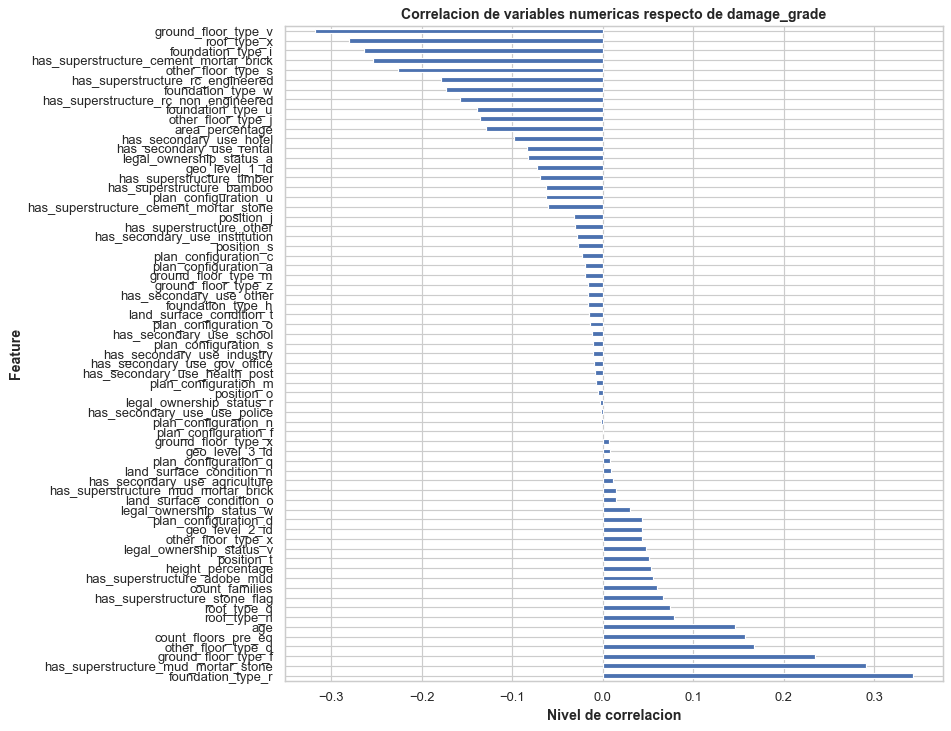

In [205]:
# Correlacion negativa --> una variable decrece mientras la otra crece o viceversa
# Correlacion positiva --> una varibale crece mientras la otra tambien, o las dos decrecen.

# Paso las features categoricas como columnas booleanas
features_categoricos = df_train.select_dtypes(include=['category']).columns.tolist()
df_con_categoricos = pd.get_dummies(df_train, prefix_sep='_', columns=features_categoricos, drop_first=False)

plt.figure(figsize=(10,10), dpi=85)
plt.title("Correlacion de variables numericas respecto de damage_grade", weight='bold')
df_con_categoricos.corr()['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot.barh()
plt.ylabel('Feature', weight='bold')
plt.xlabel("Nivel de correlacion", weight='bold')
plt.show()

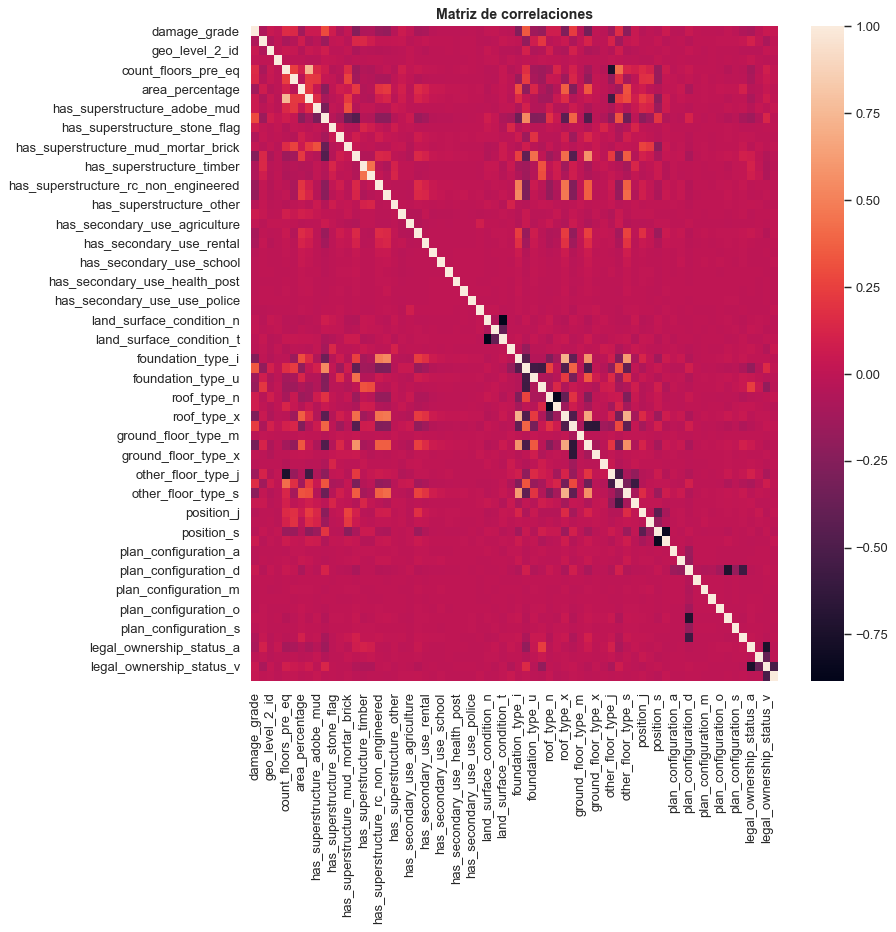

In [206]:
# Heatmap de correlaciones
plt.figure(figsize=(10, 10), dpi=85)
plt.title("Matriz de correlaciones", weight='bold')
sns.heatmap(df_con_categoricos.corr())
plt.show()

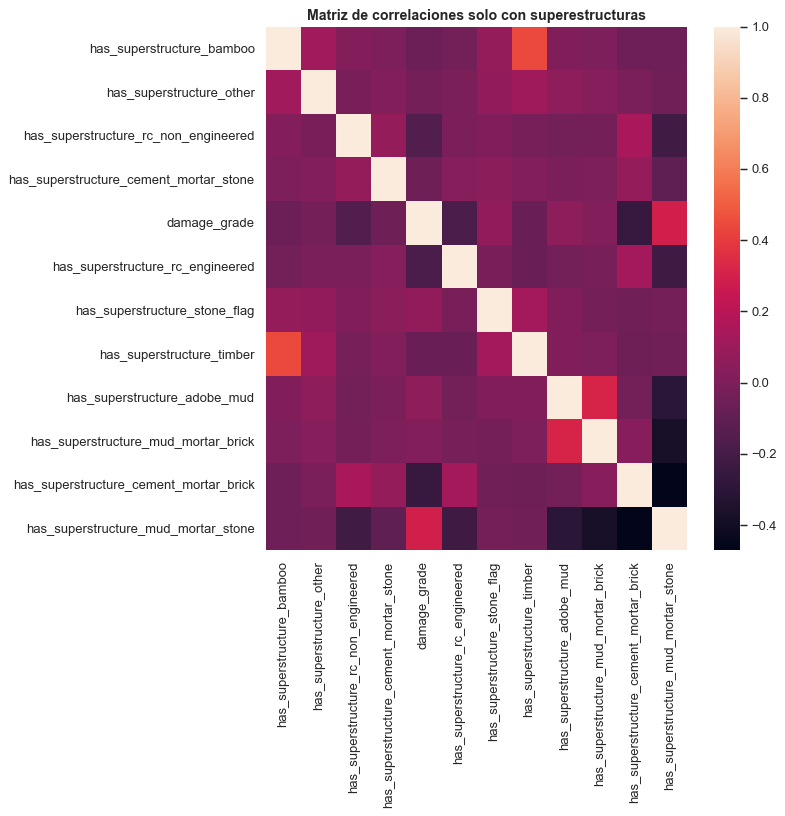

In [207]:
has_superstructure = set([col for col in df_train.columns if 'has_superstructure' in col]).union(set(['damage_grade']))
plt.figure(figsize=(8,8), dpi=85)
plt.title("Matriz de correlaciones solo con superestructuras", weight='bold')
sns.heatmap(df_train.loc[:, has_superstructure].corr())
plt.show()

## Creacion de nuevas features a partir de columnas actuales

### Trabajando con los geo_level_ids

#### Enfoque de probabilidad condicional (similar a Target/Mean Encoding)

Sabemos que los geo_level_ids tienen una alta cardinalidad para los tres tipos de IDs, pero ademas si usaramos los IDs tal y como estan podria pasar que introducieramos un cierto 'orden' que no represente lo que en realidad significan esos IDs geo-espaciales, generando una posible molestia a los modelos. Por esto, buscamos aplicar probabilidad condicional de manera de obtener, por ejemplo, 
$ P(damage\_grade = 1 \ | \ geo\_level\_1 = 14) $. Por ende, por cada columna de geo_level_id obtendriamos 3 nuevas features. El potencial problema de esto es que estariamos leakeando informacion tanto al set de test a usar para medir el score de nuestros modelos, como al set de test al cual debemos de predecir las labels para DrivenData.

> https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53

In [208]:
# Vemos que cada columna suma 1.
prueba = pd.crosstab(df_train['damage_grade'], df_train['geo_level_1_id'], normalize='columns')
prueba

geo_level_1_id,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
damage_grade,,,,,,,,,,,,,,,,,,,,,
1,0.08,0.15,0.09,0.03,0.04,0.17,0.09,0.05,0.03,0.14,...,0.02,0.13,0.06,0.21,0.08,0.35,0.04,0.00,0.02,0.09
2,0.77,0.73,0.66,0.60,0.77,0.75,0.67,0.59,0.45,0.69,...,0.39,0.74,0.69,0.69,0.78,0.56,0.48,0.59,0.88,0.79
3,0.15,0.11,0.25,0.36,0.20,0.09,0.25,0.35,0.52,0.17,...,0.58,0.13,0.25,0.10,0.14,0.09,0.48,0.41,0.10,0.11


In [209]:
prueba = prueba.T
prueba.head()

damage_grade,1,2,3
geo_level_1_id,,,
0,0.08,0.77,0.15
1,0.15,0.73,0.11
2,0.09,0.66,0.25
3,0.03,0.60,0.36
4,0.04,0.77,0.20


In [210]:
prueba[1].get(20, 0)

0.1923210966542751

In [211]:
prueba[1].get(54, 0)

0

In [212]:
# TODO: Antes de esto podriamos chequear la cardinalidad del geo level 3 y geo level 2 pq tienen muchos valores posibles
# Tambien podriamos probar con algun encoder

def calcular_proba_condicional_segun_geo_level_id(df_train, df_test, feature_geo_level):
    
    # Esta parte calcula las probas segun el set de train y agrega las columnas correspondientes
    proba_segun_danio_1 = []
    proba_segun_danio_2 = []
    proba_segun_danio_3 = []
    probas_condicionales = pd.crosstab(df_train['damage_grade'], df_train[feature_geo_level], normalize='columns')
    for _id in df_train[feature_geo_level]:
        proba_segun_danio_1.append(probas_condicionales[_id][1])
        proba_segun_danio_2.append(probas_condicionales[_id][2])
        proba_segun_danio_3.append(probas_condicionales[_id][3])
    label_spliteado = feature_geo_level.split('_')
    aux_feature_geo_level = label_spliteado[0] + label_spliteado[1] + label_spliteado[2]
    df_train['proba_danio_1_dado_' + aux_feature_geo_level] = proba_segun_danio_1
    df_train['proba_danio_2_dado_' + aux_feature_geo_level] = proba_segun_danio_2
    df_train['proba_danio_3_dado_' + aux_feature_geo_level] = proba_segun_danio_3
    
    # Usa las probas calculadas en el set de train para agregar las columnas al set de test
    proba_segun_danio_1.clear()
    proba_segun_danio_2.clear()
    proba_segun_danio_3.clear()
    probas_condicionales = probas_condicionales.T
    for _id in df_test[feature_geo_level]:
        proba_segun_danio_1.append(probas_condicionales[1].get(_id, 0))
        proba_segun_danio_2.append(probas_condicionales[2].get(_id, 0))
        proba_segun_danio_3.append(probas_condicionales[3].get(_id, 0))
    df_test['proba_danio_1_dado_' + aux_feature_geo_level] = proba_segun_danio_1
    df_test['proba_danio_2_dado_' + aux_feature_geo_level] = proba_segun_danio_2
    df_test['proba_danio_3_dado_' + aux_feature_geo_level] = proba_segun_danio_3
 

In [213]:
# Esta llamada tarda un poquito
calcular_proba_condicional_segun_geo_level_id(df_train, df_test, 'geo_level_1_id')
calcular_proba_condicional_segun_geo_level_id(df_train, df_test, 'geo_level_2_id')
calcular_proba_condicional_segun_geo_level_id(df_train, df_test, 'geo_level_3_id')

In [214]:
df_train.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_other,proba_danio_1_dado_geolevel1,proba_danio_2_dado_geolevel1,proba_danio_3_dado_geolevel1,proba_danio_1_dado_geolevel2,proba_danio_2_dado_geolevel2,proba_danio_3_dado_geolevel2,proba_danio_1_dado_geolevel3,proba_danio_2_dado_geolevel3,proba_danio_3_dado_geolevel3
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,0.09,0.67,0.25,0.00,0.25,0.74,0.00,0.16,0.84
28830,2,8,900,2812,2,10,8,7,o,r,...,False,0.03,0.45,0.52,0.01,0.49,0.50,0.06,0.81,0.12
94947,3,21,363,8973,2,10,5,5,t,r,...,False,0.02,0.39,0.58,0.08,0.32,0.60,0.03,0.36,0.61
590882,2,22,418,10694,2,10,6,5,t,r,...,False,0.13,0.74,0.13,0.02,0.85,0.13,0.03,0.84,0.13
201944,3,11,131,1488,3,30,8,9,t,r,...,False,0.05,0.57,0.38,0.03,0.59,0.38,0.01,0.61,0.38


In [215]:
df_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_other,proba_danio_1_dado_geolevel1,proba_danio_2_dado_geolevel1,proba_danio_3_dado_geolevel1,proba_danio_1_dado_geolevel2,proba_danio_2_dado_geolevel2,proba_danio_3_dado_geolevel2,proba_danio_1_dado_geolevel3,proba_danio_2_dado_geolevel3,proba_danio_3_dado_geolevel3
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0.01,0.18,0.81,0.01,0.28,0.71,0.05,0.26,0.68
99355,6,141,11987,2,25,13,5,t,r,n,...,0,0.09,0.67,0.25,0.00,0.82,0.18,0.00,1.00,0.00
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0.13,0.74,0.13,0.00,0.82,0.17,0.00,0.00,1.00
745817,26,39,633,1,0,19,3,t,r,x,...,0,0.35,0.56,0.09,0.51,0.45,0.04,0.57,0.42,0.01
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0.01,0.18,0.81,0.01,0.30,0.69,0.00,0.18,0.82


#### Enfoque de feature embedding usando redes neuronales

La idea es usar embedding similar al que se usa para textos (Word2Vec) pero con redes neuronales para casos categoricos numericos, como es en este caso los IDs. Un embedding representa data categorica en un vector de una dimensional menor a la feature que se esta analizando. Por ejemplo, si la feature es de $ R^N $ entonces el mappeo de embedding lo hace de $ R^N -> R^M $ el cual es un espacio de menos dimensiones. Es decir, actua como si fuera un 'compresor'.

> https://towardsdatascience.com/why-you-should-always-use-feature-embeddings-with-structured-datasets-7f280b40e716

> https://towardsdatascience.com/deep-learning-structured-data-8d6a278f3088

> https://medium.com/kirey-group/autoembedder-training-embedding-layers-on-unsupervised-tasks-fc364c0f6eec

> https://blog.keras.io/building-autoencoders-in-keras.html

> https://machinelearningmastery.com/autoencoder-for-classification/

> https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer

> https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction

> https://towardsdatascience.com/understanding-entity-embeddings-and-its-application-69e37ae1501d

> https://medium.com/bcggamma/a-better-way-forecasting-with-embeddings-8f45e7065f2b

In [216]:
pd.concat([df_train['geo_level_1_id'], df_test['geo_level_1_id']])

building_id
802906      6
28830       8
94947      21
590882     22
201944     11
           ..
310028      4
663567     10
1049160    22
442785      6
501372     26
Name: geo_level_1_id, Length: 347469, dtype: int64

In [217]:
pd.get_dummies(pd.concat([df_train['geo_level_1_id'], df_test['geo_level_1_id']]))

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
building_id,,,,,,,,,,,,,,,,,,,,,
802906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28830,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94947,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
590882,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
201944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
663567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1049160,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [218]:
np.array(pd.get_dummies(pd.concat([df_train['geo_level_1_id'], df_test['geo_level_1_id']])))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [219]:
def concatenar_todos_los_geo_ids(df_train, df_test):
    '''
    Concatena todos los geo level IDs de ambos datasets.
    '''
    # Necesitamos convertirlo a un np.array para que la NN pueda trabajar
    geo_level_1 = np.array(pd.get_dummies(pd.concat([df_train['geo_level_1_id'], df_test['geo_level_1_id']])))
    geo_level_2 = np.array(pd.get_dummies(pd.concat([df_train['geo_level_2_id'], df_test['geo_level_1_id']])))
    geo_level_3 = np.array(pd.get_dummies(pd.concat([df_train['geo_level_3_id'], df_test['geo_level_3_id']])))
    return geo_level_1, geo_level_2, geo_level_3

geo_level_1, geo_level_2, geo_level_3 = concatenar_todos_los_geo_ids(df_train, df_test)

In [220]:
geo_level_3.shape

(347469, 11861)

In [221]:
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Model
from time import ctime
import os.path


cant_neuronas = 10
def crear_red_neuronal():
    '''
    La cantidad de neuronas nos define la cantidad de nuevas features (columnas)
    a generar para representar los IDs ya que vamos a tomar el output de la capa intermedia.
    La idea es pasar a la NN los geo level 3 y que devuelva los geo level 1 y 2.
    Intentando al reves (input con geo level 1 y 2) y output geo level 3 consume mucha memoria.
    '''
    shape_inicial = geo_level_3.shape[1]
    # Creamos el input
    input_inicial = Input(shape=(shape_inicial, ))
    # Creamos las capas
    layer_1 = Dense(cant_neuronas, name='capa_intermedia')(input_inicial)
    layer_2a = Dense(geo_level_2.shape[1], activation='sigmoid', name='salida_1')(layer_1)
    layer_2b = Dense(geo_level_1.shape[1], activation='sigmoid', name='salida_2')(layer_1)
    # Agregamos las capas al modelo
    model = Model(inputs=input_inicial, outputs=[layer_2a, layer_2b])
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def entrenar_red_neuronal():
    model = crear_red_neuronal()
    if os.path.isfile('./geo_level_encoding.h5'):
        print('Archivo con weights de las capas cargado')
        model.load_weights('./geo_level_encoding.h5')
    else:
        print('Hora al empezar a entrenar: {}'.format(ctime()))
        model.fit(geo_level_3, [geo_level_2, geo_level_1], batch_size=128, epochs=10, verbose=2)
        # Guardamos el modelo para NO tener que entrenarlo siempre ya que consume tiempo
        print('Hora al finalizar de entrenar: {}'.format(ctime()))
        model.save('geo_level_encoding.h5')
    return model

In [222]:
model = entrenar_red_neuronal()

Archivo con weights de las capas cargado


In [223]:
# https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('capa_intermedia').output)
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [224]:
display(model.input)
display(model.get_layer('capa_intermedia').output)

<KerasTensor: shape=(None, 11861) dtype=float32 (created by layer 'input_3')>

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'capa_intermedia')>

In [225]:
# Prueba
pruebita = []
for data in geo_level_3[: 3]:
    data = data.reshape((1, data.shape[0]))
    pruebita.append(data)
    print(intermediate_layer_model(data)[0])
    print(data)
    print(data.ndim)
    print(data.shape)

tf.Tensor(
[-1.2072995   0.3976997   0.16488299  2.1055505   1.2825814  -1.0326707
 -1.3633697   0.75835884  1.9453921   1.8801138 ], shape=(10,), dtype=float32)
[[0 0 0 ... 0 0 0]]
2
(1, 11861)
tf.Tensor(
[-1.0710168  -0.6558637  -1.8519567   0.6012325   1.8402219   0.38511193
 -0.34181887  2.040253    0.09490484  1.0579882 ], shape=(10,), dtype=float32)
[[0 0 0 ... 0 0 0]]
2
(1, 11861)
tf.Tensor(
[-0.5802153  -2.2190788  -1.961107    3.1428962   2.365479   -1.5691566
  0.9673521   2.278401    2.2831802  -0.21784115], shape=(10,), dtype=float32)
[[0 0 0 ... 0 0 0]]
2
(1, 11861)


In [226]:
cant_registros = df_train.shape[0]
def extraer_y_agregar_geo_embebidas(df, train_o_test='train'):
    '''
    Extrae los outputs de la capa intermedia y los agrega al dataset
    '''
    def extraer_geo_embebidas(data, output):
        data = data.reshape((1, data.shape[0]))
        layer_output = intermediate_layer_model(data)[0]
        output.append(layer_output)
    
    output = []
    if train_o_test == 'train':
        for data in geo_level_3[: cant_registros]:
            extraer_geo_embebidas(data, output)
    # Extraemos los outputs de la capa intermedia
    else:
        for data in geo_level_3[cant_registros: ]:
            extraer_geo_embebidas(data, output)
    # Formateo, volviendo todo un vector con 1 fila y (cant_neuronas) de columnas
    output = np.array(output)
    output = np.squeeze(output)
    # Los agregamos al dataset
    for i in range(0, cant_neuronas):
        df['geo_level_embedded_' + str(i)] = output[:, i]

In [227]:
# Esta llamada tarda un poco
extraer_y_agregar_geo_embebidas(df_train, 'train')

In [228]:
df_train.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,geo_level_embedded_0,geo_level_embedded_1,geo_level_embedded_2,geo_level_embedded_3,geo_level_embedded_4,geo_level_embedded_5,geo_level_embedded_6,geo_level_embedded_7,geo_level_embedded_8,geo_level_embedded_9
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,-1.21,0.40,0.16,2.11,1.28,-1.03,-1.36,0.76,1.95,1.88
28830,2,8,900,2812,2,10,8,7,o,r,...,-1.07,-0.66,-1.85,0.60,1.84,0.39,-0.34,2.04,0.09,1.06
94947,3,21,363,8973,2,10,5,5,t,r,...,-0.58,-2.22,-1.96,3.14,2.37,-1.57,0.97,2.28,2.28,-0.22
590882,2,22,418,10694,2,10,6,5,t,r,...,-1.44,-1.65,-0.79,0.10,1.04,0.05,-0.04,2.06,1.96,0.14
201944,3,11,131,1488,3,30,8,9,t,r,...,-1.79,-0.37,-2.89,-0.25,2.91,-1.08,-1.82,-0.16,1.71,1.93


In [229]:
# Esta llamada tarda un poco pero menos que la anterior
extraer_y_agregar_geo_embebidas(df_test, 'test')

In [230]:
df_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,geo_level_embedded_0,geo_level_embedded_1,geo_level_embedded_2,geo_level_embedded_3,geo_level_embedded_4,geo_level_embedded_5,geo_level_embedded_6,geo_level_embedded_7,geo_level_embedded_8,geo_level_embedded_9
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0.15,-0.76,-1.38,1.34,0.75,0.41,-1.43,1.85,1.49,0.38
99355,6,141,11987,2,25,13,5,t,r,n,...,-1.07,-0.50,0.18,1.55,1.02,-1.05,-0.70,0.11,1.47,1.73
890251,22,19,10044,2,5,4,5,t,r,n,...,-0.80,-1.29,-0.47,0.43,0.67,0.14,0.13,1.52,1.38,0.58
745817,26,39,633,1,0,19,3,t,r,x,...,-1.22,-2.32,-0.99,2.93,0.86,-2.83,-1.24,2.62,-1.13,3.75
421793,17,289,7970,3,15,8,7,t,r,q,...,-0.08,-0.75,-1.47,1.64,0.76,0.46,-1.46,1.93,1.46,0.15


In [231]:
# Droppeamos las columnas de geo level id
df_train.drop(columns=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], inplace=True)
df_test.drop(columns=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], inplace=True)

In [232]:
df_train.head()

,damage_grade,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,geo_level_embedded_0,geo_level_embedded_1,geo_level_embedded_2,geo_level_embedded_3,geo_level_embedded_4,geo_level_embedded_5,geo_level_embedded_6,geo_level_embedded_7,geo_level_embedded_8,geo_level_embedded_9
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,2,30,6,5,t,r,n,f,q,...,-1.21,0.40,0.16,2.11,1.28,-1.03,-1.36,0.76,1.95,1.88
28830,2,2,10,8,7,o,r,n,x,q,...,-1.07,-0.66,-1.85,0.60,1.84,0.39,-0.34,2.04,0.09,1.06
94947,3,2,10,5,5,t,r,n,f,x,...,-0.58,-2.22,-1.96,3.14,2.37,-1.57,0.97,2.28,2.28,-0.22
590882,2,2,10,6,5,t,r,n,f,x,...,-1.44,-1.65,-0.79,0.10,1.04,0.05,-0.04,2.06,1.96,0.14
201944,3,3,30,8,9,t,r,n,f,x,...,-1.79,-0.37,-2.89,-0.25,2.91,-1.08,-1.82,-0.16,1.71,1.93


### Features basadas en la antiguedad del edificio

In [233]:
def calcular_anio_edificacion(df):
    # Los datos fueron recolectados en 2015
    df['anio_edificacion'] = 2015 - df['age']
    # En Nepal en 1994 se crea el codigo de construccion a tener en cuenta para que
    # los edificios sean resistentes a terremetos
    df['construida_antes_de_codigo'] = 1994 < df['anio_edificacion']
    

In [234]:
calcular_anio_edificacion(df_train)
df_train.head()

,damage_grade,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,geo_level_embedded_2,geo_level_embedded_3,geo_level_embedded_4,geo_level_embedded_5,geo_level_embedded_6,geo_level_embedded_7,geo_level_embedded_8,geo_level_embedded_9,anio_edificacion,construida_antes_de_codigo
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,2,30,6,5,t,r,n,f,q,...,0.16,2.11,1.28,-1.03,-1.36,0.76,1.95,1.88,1985,False
28830,2,2,10,8,7,o,r,n,x,q,...,-1.85,0.60,1.84,0.39,-0.34,2.04,0.09,1.06,2005,True
94947,3,2,10,5,5,t,r,n,f,x,...,-1.96,3.14,2.37,-1.57,0.97,2.28,2.28,-0.22,2005,True
590882,2,2,10,6,5,t,r,n,f,x,...,-0.79,0.10,1.04,0.05,-0.04,2.06,1.96,0.14,2005,True
201944,3,3,30,8,9,t,r,n,f,x,...,-2.89,-0.25,2.91,-1.08,-1.82,-0.16,1.71,1.93,1985,False


In [235]:
df_train['construida_antes_de_codigo'].value_counts()

True     166826
False     93775
Name: construida_antes_de_codigo, dtype: int64

### Features basados en cantidad de pisos, area, altura y cantidad de familias

In [236]:
# En algunos casos hago df['age'] + 1 ya que hay casos con 0 años de antiguedad
# El tema es que en algunos casos da valores alto, por ahora lo dejo asi pero se puede sacar
def features_basadas_en_cantidad_de_pisos(df):
    df['cant_pisos_por_antiguedad'] = df['count_floors_pre_eq'] / (df['age'] + 1)
    df['cant_pisos_por_area'] = df['count_floors_pre_eq'] / df['area_percentage']
    df['cant_pisos_por_altura'] = df['count_floors_pre_eq'] / df['height_percentage']
    
def features_basadas_en_area_altura(df):
    df['area_por_antiguedad'] = df['area_percentage'] / (df['age'] + 1)
    df['altura_por_antiguedad'] = df['height_percentage'] / (df['age'] + 1)
    df['area_por_altura'] = df['area_percentage'] / df['height_percentage']
    df['producto_area_altura'] = df['area_percentage'] * df['height_percentage']
    df['area_al_cuadrado'] = df['area_percentage'] ** 2
    df['altura_al_cuadrado'] = df['height_percentage'] ** 2
    df['promedio_area_altura'] = (df['area_percentage'] + df['height_percentage']) / 2

def features_basadas_en_cantidad_familias(df):
    df['cant_familias_por_pisos'] = df['count_families'] / df['count_floors_pre_eq']
    df['cant_familias_por_area'] = df['count_families'] / df['area_percentage']
    df['cant_familias_por_altura'] = df['count_families'] / df['height_percentage']

In [237]:
features_basadas_en_cantidad_de_pisos(df_train)
features_basadas_en_area_altura(df_train)
features_basadas_en_cantidad_familias(df_train)
df_train.head()

,damage_grade,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,area_por_antiguedad,altura_por_antiguedad,area_por_altura,producto_area_altura,area_al_cuadrado,altura_al_cuadrado,promedio_area_altura,cant_familias_por_pisos,cant_familias_por_area,cant_familias_por_altura
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,2,30,6,5,t,r,n,f,q,...,0.19,0.16,1.20,30,36,25,5.50,0.50,0.17,0.20
28830,2,2,10,8,7,o,r,n,x,q,...,0.73,0.64,1.14,56,64,49,7.50,0.50,0.12,0.14
94947,3,2,10,5,5,t,r,n,f,x,...,0.45,0.45,1.00,25,25,25,5.00,0.50,0.20,0.20
590882,2,2,10,6,5,t,r,n,f,x,...,0.55,0.45,1.20,30,36,25,5.50,0.50,0.17,0.20
201944,3,3,30,8,9,t,r,n,f,x,...,0.26,0.29,0.89,72,64,81,8.50,0.33,0.12,0.11


### Features basados en uso secundario y tipo de superestructura

In [238]:
def features_basados_en_superestructura(df):
    has_superstructure = set([col for col in df.columns if 'has_superstructure' in col])
    only_superstructure = df.loc[:, has_superstructure]
    only_superstructure['cant_materiales'] = only_superstructure.sum(axis=1, numeric_only=True)
    result = df.join(only_superstructure['cant_materiales'], on='building_id')
    return result

In [239]:
df_train = features_basados_en_superestructura(df_train)
df_train.head()

,damage_grade,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,altura_por_antiguedad,area_por_altura,producto_area_altura,area_al_cuadrado,altura_al_cuadrado,promedio_area_altura,cant_familias_por_pisos,cant_familias_por_area,cant_familias_por_altura,cant_materiales
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,2,30,6,5,t,r,n,f,q,...,0.16,1.20,30,36,25,5.50,0.50,0.17,0.20,2
28830,2,2,10,8,7,o,r,n,x,q,...,0.64,1.14,56,64,49,7.50,0.50,0.12,0.14,1
94947,3,2,10,5,5,t,r,n,f,x,...,0.45,1.00,25,25,25,5.00,0.50,0.20,0.20,1
590882,2,2,10,6,5,t,r,n,f,x,...,0.45,1.20,30,36,25,5.50,0.50,0.17,0.20,3
201944,3,3,30,8,9,t,r,n,f,x,...,0.29,0.89,72,64,81,8.50,0.33,0.12,0.11,1


### Encoding de variables categoricas

> https://contrib.scikit-learn.org/category_encoders/

In [240]:
categoricos = set(df_train.select_dtypes(include='category').columns.tolist())
for cat in categoricos:
    tipos_posibles = df_train[cat].nunique()
    print('La columna {} tiene {} tipos posibles'.format(cat, tipos_posibles))

La columna plan_configuration tiene 10 tipos posibles
La columna foundation_type tiene 5 tipos posibles
La columna land_surface_condition tiene 3 tipos posibles
La columna roof_type tiene 3 tipos posibles
La columna legal_ownership_status tiene 4 tipos posibles
La columna other_floor_type tiene 4 tipos posibles
La columna position tiene 4 tipos posibles
La columna ground_floor_type tiene 5 tipos posibles


In [241]:
df_train['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [242]:
from category_encoders import OneHotEncoder

def apply_one_hot_encoding(df_train, df_test):
    '''
    Aplica one hot encoding a los labels seleccionados.
    Tener cuidado que un label NO tenga demasiados tipos de valores posibles.
    '''
    cat_features = set(df_train.select_dtypes(include='category').columns.tolist())
    ohe_enc = OneHotEncoder(cols=cat_features, use_cat_names=True)
    ohe_train = ohe_enc.fit_transform(df_train[cat_features])
    ohe_test = ohe_enc.transform(df_test[cat_features])
    to_train = df_train.join(ohe_train)
    to_test = df_test.join(ohe_test)
    to_train.drop(columns=cat_features, inplace=True)
    to_test.drop(columns=cat_features, inplace=True)
    return to_train, to_test

In [243]:
df_train, df_test = apply_one_hot_encoding(df_train, df_test)

In [244]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 100 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   damage_grade                            260601 non-null  uint8  
 1   count_floors_pre_eq                     260601 non-null  uint8  
 2   age                                     260601 non-null  uint8  
 3   area_percentage                         260601 non-null  uint8  
 4   height_percentage                       260601 non-null  uint8  
 5   has_superstructure_adobe_mud            260601 non-null  bool   
 6   has_superstructure_mud_mortar_stone     260601 non-null  bool   
 7   has_superstructure_stone_flag           260601 non-null  bool   
 8   has_superstructure_cement_mortar_stone  260601 non-null  bool   
 9   has_superstructure_mud_mortar_brick     260601 non-null  bool   
 10  has_superstructure_cement_mortar_brick

In [245]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86868 entries, 300051 to 501372
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   count_floors_pre_eq                     86868 non-null  int64  
 1   age                                     86868 non-null  int64  
 2   area_percentage                         86868 non-null  int64  
 3   height_percentage                       86868 non-null  int64  
 4   has_superstructure_adobe_mud            86868 non-null  int64  
 5   has_superstructure_mud_mortar_stone     86868 non-null  int64  
 6   has_superstructure_stone_flag           86868 non-null  int64  
 7   has_superstructure_cement_mortar_stone  86868 non-null  int64  
 8   has_superstructure_mud_mortar_brick     86868 non-null  int64  
 9   has_superstructure_cement_mortar_brick  86868 non-null  int64  
 10  has_superstructure_timber               86868 non-nu

### Transformando el set de test para utilizacion de los modelos

In [246]:
drop_features_redundantes(df_test, features_redundantes)
calcular_anio_edificacion(df_test)
features_basadas_en_cantidad_de_pisos(df_test)
features_basadas_en_area_altura(df_test)
features_basadas_en_cantidad_familias(df_test)
df_test = features_basados_en_superestructura(df_test)

In [247]:
df_train.shape

(260601, 100)

In [248]:
df_test.shape

(86868, 99)

In [249]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 100 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   damage_grade                            260601 non-null  uint8  
 1   count_floors_pre_eq                     260601 non-null  uint8  
 2   age                                     260601 non-null  uint8  
 3   area_percentage                         260601 non-null  uint8  
 4   height_percentage                       260601 non-null  uint8  
 5   has_superstructure_adobe_mud            260601 non-null  bool   
 6   has_superstructure_mud_mortar_stone     260601 non-null  bool   
 7   has_superstructure_stone_flag           260601 non-null  bool   
 8   has_superstructure_cement_mortar_stone  260601 non-null  bool   
 9   has_superstructure_mud_mortar_brick     260601 non-null  bool   
 10  has_superstructure_cement_mortar_brick

In [250]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86868 entries, 300051 to 501372
Data columns (total 99 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   count_floors_pre_eq                     86868 non-null  int64  
 1   age                                     86868 non-null  int64  
 2   area_percentage                         86868 non-null  int64  
 3   height_percentage                       86868 non-null  int64  
 4   has_superstructure_adobe_mud            86868 non-null  int64  
 5   has_superstructure_mud_mortar_stone     86868 non-null  int64  
 6   has_superstructure_stone_flag           86868 non-null  int64  
 7   has_superstructure_cement_mortar_stone  86868 non-null  int64  
 8   has_superstructure_mud_mortar_brick     86868 non-null  int64  
 9   has_superstructure_cement_mortar_brick  86868 non-null  int64  
 10  has_superstructure_timber               86868 non-nu

## Guardando datasets para su procesamiento por modelos

In [251]:
df_test.head(1)

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,altura_por_antiguedad,area_por_altura,producto_area_altura,area_al_cuadrado,altura_al_cuadrado,promedio_area_altura,cant_familias_por_pisos,cant_familias_por_area,cant_familias_por_altura,cant_materiales
building_id,,,,,,,,,,,,,,,,,,,,,
300051,3,20,7,6,0,1,0,0,0,0,...,0.29,1.17,42,49,36,6.50,0.33,0.14,0.17,1


In [252]:
df_train.head(1)

,damage_grade,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,other_floor_type_s,position_t,position_s,position_j,position_o,ground_floor_type_f,ground_floor_type_x,ground_floor_type_v,ground_floor_type_z,ground_floor_type_m
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,2,30,6,5,True,True,False,False,False,...,0,1,0,0,0,1,0,0,0,0


In [253]:
df_train.shape

(260601, 100)

In [254]:
df_test.shape

(86868, 99)

In [255]:
df_train.to_csv('../data/to_train_01.csv', index=False)
df_test.to_csv('../data/to_test_01.csv', index=False)